In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [3]:
df.deposit.value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null int64
marital      11162 non-null int64
education    11162 non-null int64
default      11162 non-null int64
balance      11162 non-null int64
housing      11162 non-null int64
loan         11162 non-null int64
contact      11162 non-null int64
day          11162 non-null int64
month        11162 non-null int64
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null int64
deposit      11162 non-null int64
dtypes: int64(17)
memory usage: 1.4 MB


In [5]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [7]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print(classification_report(ytest, ypred))

In [8]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()

In [9]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.80      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



In [10]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1760
           1       0.75      0.72      0.74      1589

    accuracy                           0.75      3349
   macro avg       0.75      0.75      0.75      3349
weighted avg       0.75      0.75      0.75      3349



In [11]:
mymodel(svm)

              precision    recall  f1-score   support

           0       0.53      1.00      0.69      1760
           1       0.43      0.00      0.00      1589

    accuracy                           0.53      3349
   macro avg       0.48      0.50      0.35      3349
weighted avg       0.48      0.53      0.36      3349



In [12]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1760
           1       0.78      0.78      0.78      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349



In [13]:
dt.score(xtrain, ytrain)

1.0

In [14]:
dt.score(xtest, ytest)

0.7873992236488504

In [15]:
dt.feature_importances_

array([0.0779005 , 0.03467078, 0.01775884, 0.01535332, 0.00084141,
       0.08552846, 0.04297254, 0.00605969, 0.06236331, 0.07371894,
       0.09635934, 0.35266526, 0.02305529, 0.05544872, 0.01995678,
       0.0353468 ])

In [16]:
dt1 = DecisionTreeClassifier(max_depth=10)
mymodel(dt1)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1760
           1       0.81      0.81      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



In [17]:
for i in range(1,50):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(xtrain, ytrain)
    ypred = dt2.predict(xtest)
    print(f" {i} -: {accuracy_score(ytest, ypred)}")

 1 -: 0.7121528814571514
 2 -: 0.7121528814571514
 3 -: 0.771275007464915
 4 -: 0.78501045088086
 5 -: 0.7990444908928038
 6 -: 0.8011346670647954
 7 -: 0.8151687070767393
 8 -: 0.818751866228725
 9 -: 0.808002388772768
 10 -: 0.8175574798447298
 11 -: 0.8175574798447298
 12 -: 0.8148701104807405
 13 -: 0.8100925649447597
 14 -: 0.8011346670647954
 15 -: 0.8002388772767991
 16 -: 0.7969543147208121
 17 -: 0.795759928336817
 18 -: 0.7844132576888624
 19 -: 0.7888922066288444
 20 -: 0.7876978202448492
 21 -: 0.7873992236488504
 22 -: 0.7871006270528516
 23 -: 0.7856076440728575
 24 -: 0.7921767691848313
 25 -: 0.7876978202448492
 26 -: 0.7894893998208421
 27 -: 0.786503433860854
 28 -: 0.7811286951328755
 29 -: 0.7856076440728575
 30 -: 0.7891908032248433
 31 -: 0.7885936100328457
 32 -: 0.7891908032248433
 33 -: 0.792773962376829
 34 -: 0.792773962376829
 35 -: 0.7856076440728575
 36 -: 0.7841146610928635
 37 -: 0.7868020304568528
 38 -: 0.7912809793968348
 39 -: 0.7847118542848611
 40 

In [18]:
dt3 = DecisionTreeClassifier(max_depth=8)
mymodel(dt3)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1760
           1       0.81      0.81      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



In [19]:
dt4 = DecisionTreeClassifier(min_samples_leaf=10)
mymodel(dt4)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1760
           1       0.81      0.80      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



In [20]:
for i in range(1,75):
    dt5 = DecisionTreeClassifier(min_samples_leaf=i)
    dt5.fit(xtrain, ytrain)
    ypred = dt5.predict(xtest)
    print(f" {i} -: {accuracy_score(ytest, ypred)}")

 1 -: 0.7832188713048671
 2 -: 0.771275007464915
 3 -: 0.7853090474768588
 4 -: 0.7862048372648551
 5 -: 0.7882950134368468
 6 -: 0.7945655419528217
 7 -: 0.8062108091967751
 8 -: 0.8124813377127501
 9 -: 0.8106897581367573
 10 -: 0.814272917288743
 11 -: 0.8115855479247537
 12 -: 0.8139743206927441
 13 -: 0.8127799343087488
 14 -: 0.8139743206927441
 15 -: 0.8169602866527321
 16 -: 0.8178560764407286
 17 -: 0.8214392355927143
 18 -: 0.8196476560167214
 19 -: 0.8244252015527023
 20 -: 0.8274111675126904
 21 -: 0.8274111675126904
 22 -: 0.8286055538966856
 23 -: 0.8283069573006868
 24 -: 0.8259181845326963
 25 -: 0.8277097641086891
 26 -: 0.8262167811286951
 27 -: 0.8262167811286951
 28 -: 0.8256195879366975
 29 -: 0.8274111675126904
 30 -: 0.8238280083607047
 31 -: 0.8262167811286951
 32 -: 0.8262167811286951
 33 -: 0.8250223947447
 34 -: 0.826515377724694
 35 -: 0.8253209913406987
 36 -: 0.8253209913406987
 37 -: 0.8259181845326963
 38 -: 0.8256195879366975
 39 -: 0.8283069573006868
 

In [21]:
dt6 = DecisionTreeClassifier(min_samples_leaf=41)
mymodel(dt6)

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1760
           1       0.80      0.85      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



In [22]:
dt7 = DecisionTreeClassifier(max_depth=8, min_samples_leaf=41)
mymodel(dt7)

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1760
           1       0.80      0.83      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



In [23]:
dt8 = DecisionTreeClassifier(criterion='gini',min_samples_leaf=41)
mymodel(dt8)

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1760
           1       0.80      0.85      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



# Criterion = "Entropy"

In [24]:
dt9 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=41)
mymodel(dt9)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1760
           1       0.80      0.83      0.82      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



In [25]:
dt10 = DecisionTreeClassifier(criterion='entropy',max_depth=8)
mymodel(dt10)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1760
           1       0.80      0.79      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



In [26]:
for i in range(1,50):
    dt11 = DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dt11.fit(xtrain, ytrain)
    ypred = dt11.predict(xtest)
    print(f" {i} -: {accuracy_score(ytest, ypred)}")

 1 -: 0.7121528814571514
 2 -: 0.7121528814571514
 3 -: 0.7584353538369663
 4 -: 0.774260973424903
 5 -: 0.7781427291728874
 6 -: 0.7933711555688265
 7 -: 0.8074051955807704
 8 -: 0.8088981785607644
 9 -: 0.8136757240967453
 10 -: 0.8151687070767393
 11 -: 0.809495371752762
 12 -: 0.8083009853687668
 13 -: 0.8026276500447895
 14 -: 0.7984472977008062
 15 -: 0.7984472977008062
 16 -: 0.787996416840848
 17 -: 0.7960585249328158
 18 -: 0.7888922066288444
 19 -: 0.787996416840848
 20 -: 0.7838160644968647
 21 -: 0.787996416840848
 22 -: 0.7933711555688265
 23 -: 0.7859062406688564
 24 -: 0.7859062406688564
 25 -: 0.7805315019408778
 26 -: 0.783517467900866
 27 -: 0.7826216781128695
 28 -: 0.7832188713048671
 29 -: 0.7853090474768588
 30 -: 0.7862048372648551
 31 -: 0.7748581666169005
 32 -: 0.782024484920872
 33 -: 0.7853090474768588
 34 -: 0.7847118542848611
 35 -: 0.7832188713048671
 36 -: 0.787996416840848
 37 -: 0.7873992236488504
 38 -: 0.7853090474768588
 39 -: 0.7862048372648551
 40

In [27]:
dt12 = DecisionTreeClassifier(criterion='entropy',max_depth=8)
mymodel(dt12)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1760
           1       0.80      0.79      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



In [28]:
for i in range(1,75):
    dt13 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=i)
    dt13.fit(xtrain, ytrain)
    ypred = dt13.predict(xtest)
    print(f" {i} -: {accuracy_score(ytest, ypred)}")

 1 -: 0.7778441325768887
 2 -: 0.7718722006569125
 3 -: 0.7897879964168408
 4 -: 0.7918781725888325
 5 -: 0.7960585249328158
 6 -: 0.7921767691848313
 7 -: 0.8091967751567632
 8 -: 0.8115855479247537
 9 -: 0.8088981785607644
 10 -: 0.8044192296207823
 11 -: 0.8100925649447597
 12 -: 0.815765900268737
 13 -: 0.8208420424007167
 14 -: 0.8199462526127202
 15 -: 0.8250223947447
 16 -: 0.8184532696327261
 17 -: 0.820244849208719
 18 -: 0.8199462526127202
 19 -: 0.8247237981487011
 20 -: 0.8238280083607047
 21 -: 0.8226336219767094
 22 -: 0.820244849208719
 23 -: 0.8160644968647357
 24 -: 0.8169602866527321
 25 -: 0.817258883248731
 26 -: 0.8196476560167214
 27 -: 0.8151687070767393
 28 -: 0.8181546730367274
 29 -: 0.8181546730367274
 30 -: 0.817258883248731
 31 -: 0.8169602866527321
 32 -: 0.8193490594207226
 33 -: 0.8193490594207226
 34 -: 0.8208420424007167
 35 -: 0.8208420424007167
 36 -: 0.8196476560167214
 37 -: 0.8235294117647058
 38 -: 0.8238280083607047
 39 -: 0.8229322185727083
 40

# Final Results

In [29]:
dt14 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=43)
mymodel(dt14)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1760
           1       0.81      0.83      0.82      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



In [30]:
dt15 = DecisionTreeClassifier(criterion='gini',min_samples_leaf=41)
mymodel(dt15)

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1760
           1       0.80      0.85      0.83      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



In [31]:
cvs = cross_val_score(dt14, x,y, cv=5, scoring="accuracy")
print(cvs.mean()) #entropy

0.7920672085673015


In [32]:
cvs = cross_val_score(dt15, x,y, cv=5, scoring="accuracy")
print(cvs.mean()) #gini

0.7908148553862029


In [33]:
from sklearn import tree

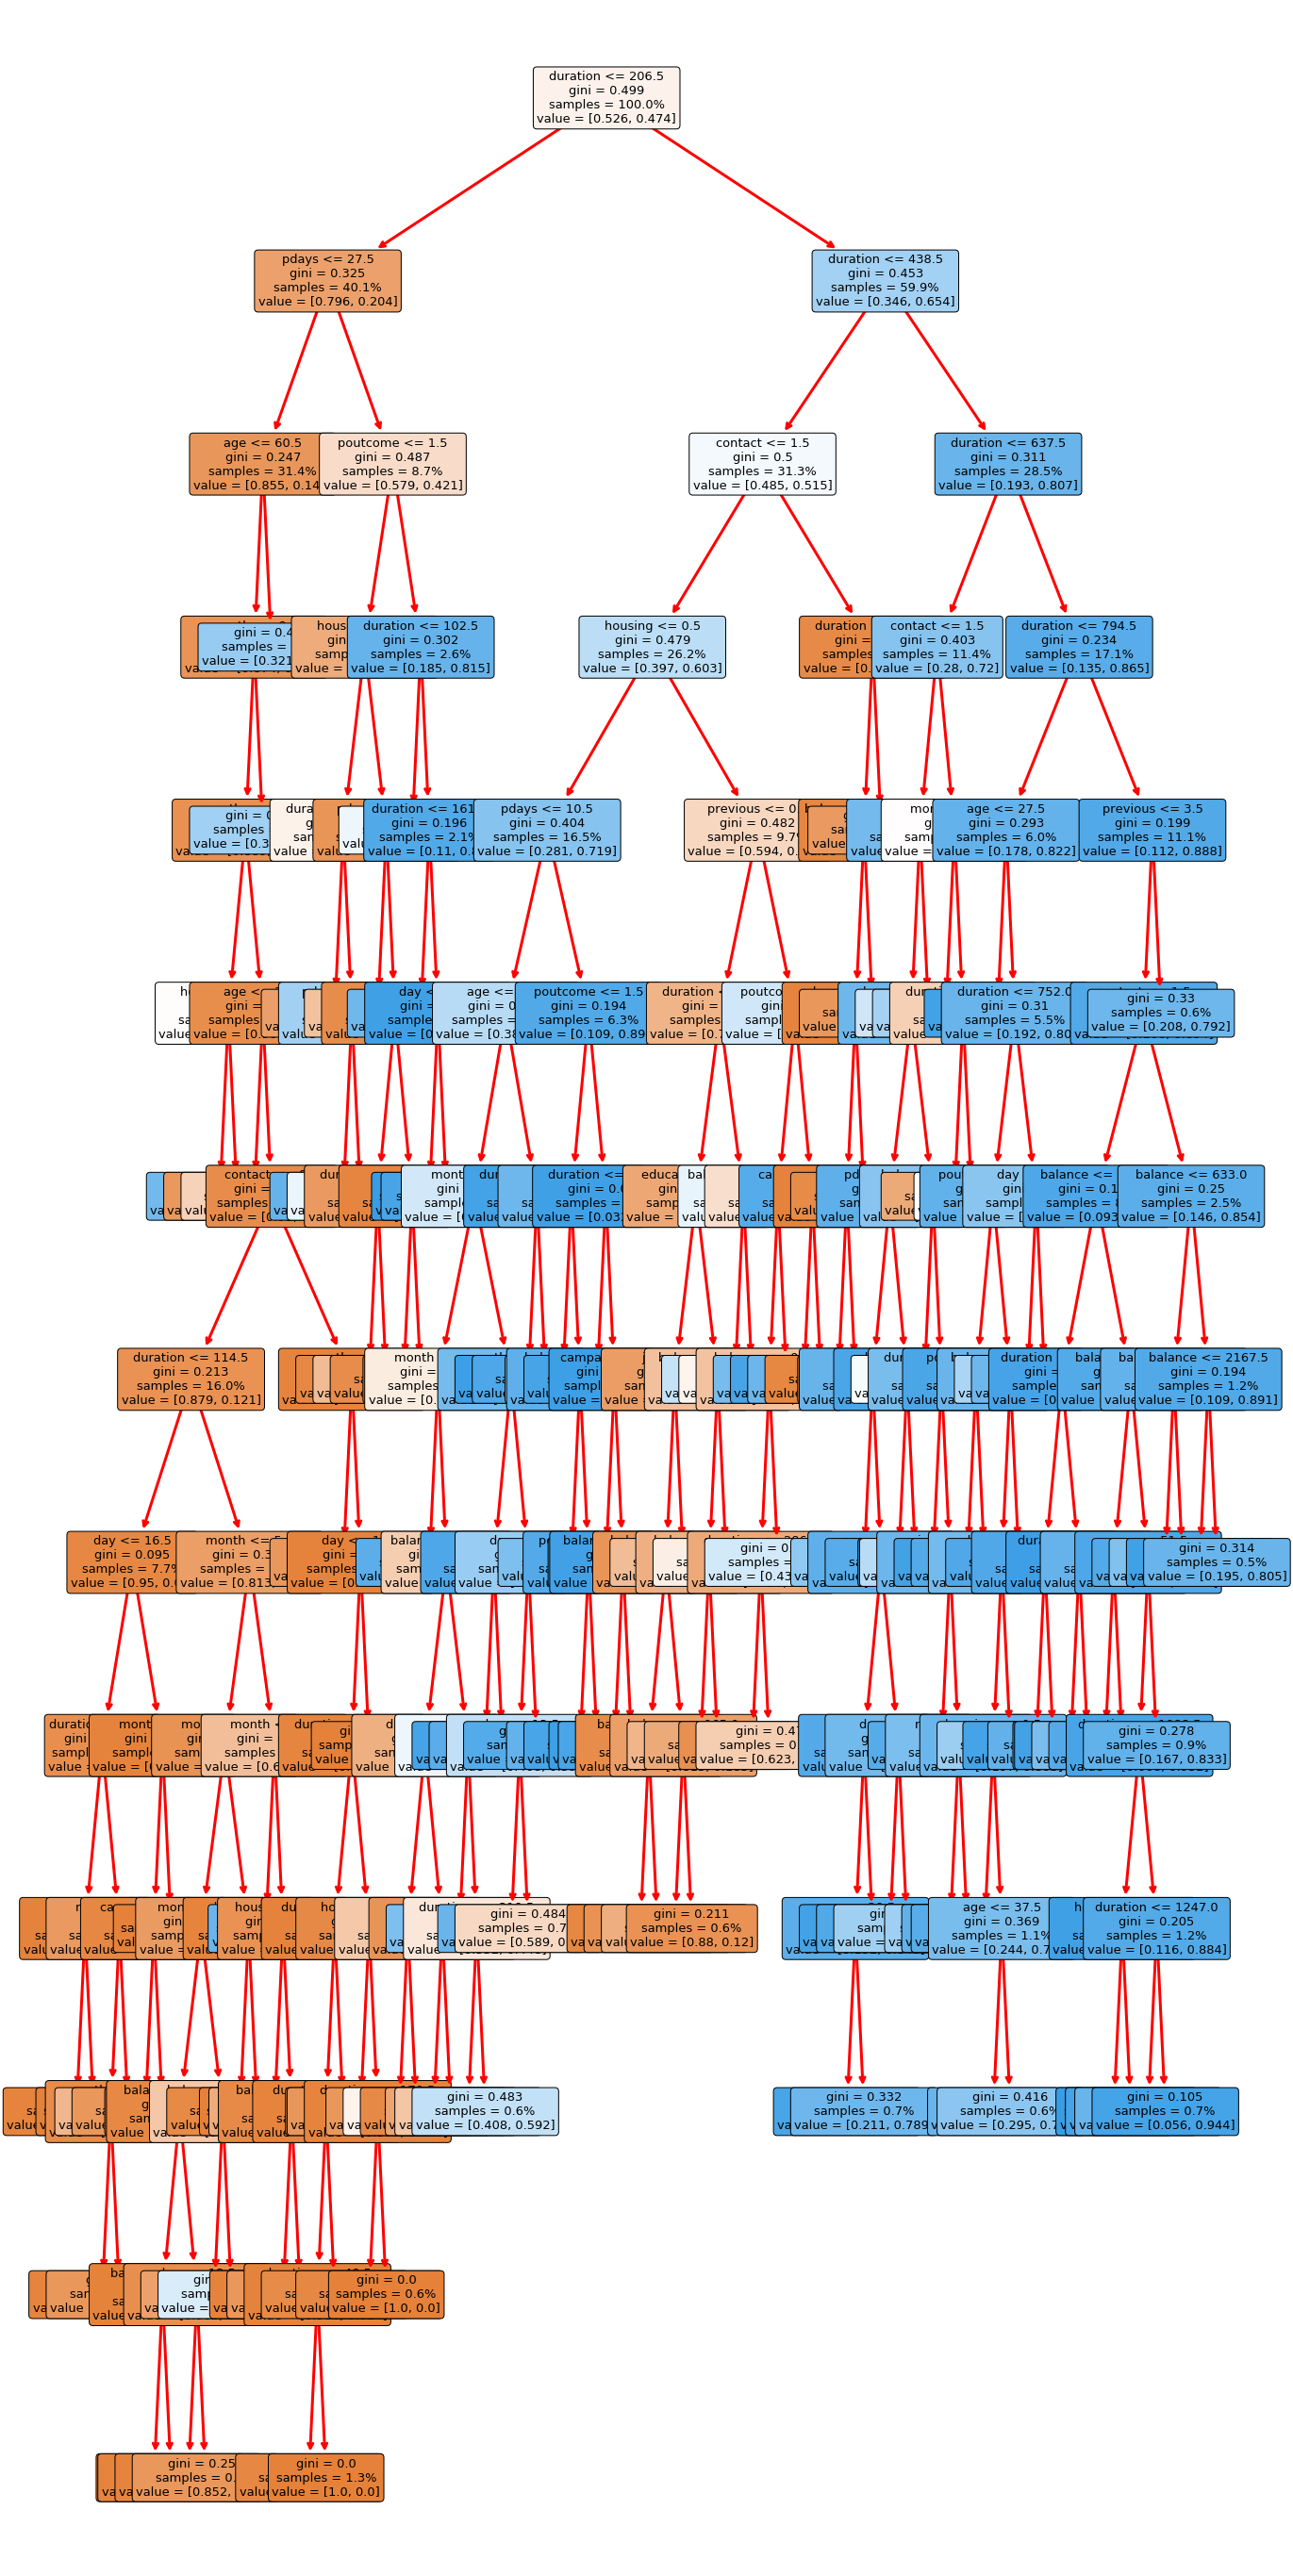

In [34]:
fig, ax = plt.subplots(figsize=(22,50))
chart = tree.plot_tree(dt15, feature_names=df.columns, fontsize=13, filled="True", proportion=True, rounded=10)

for node in chart:
    arrow = node.arrow_patch
    if(arrow is not None):
        arrow.set_edgecolor("red")
        arrow.set_linewidth(3)

A decision tree is a tree where each node represents a feature(attribute), each link(branch) represents a decision(rule) and each leaf represents an outcome(categorical or continues value)